#  Fundamentals of Data Analysis 
## Diarmuid Whelan Assignment 22-10-2018
This Jupyter notebook  will analyse Anscombe’s quartet dataset across 4 areas, as follows:
 - Explain the background to the dataset – who created it, when it was created, and any speculation you can find regarding how it might have been created
 - Plot the interesting aspects of the dataset
 - Calculate the descriptive statistics of the variables in the dataset
 - Explain why the dataset is interesting, referring to the plots and statistics above
 
## Background
Anscombe's quartet dataset was created by and English statistician Frank Anscombe in 1973. The dataset was used in a paper published by Anscombe entitled "Graphs in Statistical Analysis".

 

In [1]:
#Load dataset and packages
import pandas
import numpy
import matplotlib.pyplot as pl
#Open the anscombe.CSV FILE
anscombe=pandas.read_csv('/Users/diarmuid/untitled folder/GMIT DATA ANALYTICS/anscombe.csv',delimiter=',')
print(anscombe)
#Print the shape of the data
print(anscombe.shape)

    Unnamed: 0  x1  x2  x3  x4     y1    y2     y3     y4
0            1  10  10  10   8   8.04  9.14   7.46   6.58
1            2   8   8   8   8   6.95  8.14   6.77   5.76
2            3  13  13  13   8   7.58  8.74  12.74   7.71
3            4   9   9   9   8   8.81  8.77   7.11   8.84
4            5  11  11  11   8   8.33  9.26   7.81   8.47
5            6  14  14  14   8   9.96  8.10   8.84   7.04
6            7   6   6   6   8   7.24  6.13   6.08   5.25
7            8   4   4   4  19   4.26  3.10   5.39  12.50
8            9  12  12  12   8  10.84  9.13   8.15   5.56
9           10   7   7   7   8   4.82  7.26   6.42   7.91
10          11   5   5   5   8   5.68  4.74   5.73   6.89
(11, 9)


As seen above the dataset consists of 8 columns of data. 4 XY pairs (x1,y1),(x2,y2),(x3,y3),(x4,y4).


## Plotting the Dataset
Simple XY scatter plots of each of the XY pairs

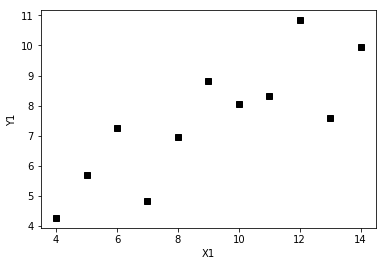

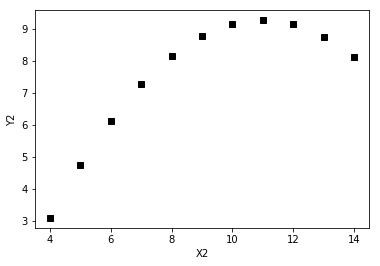

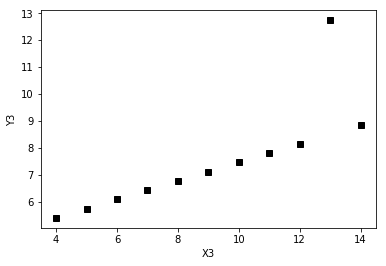

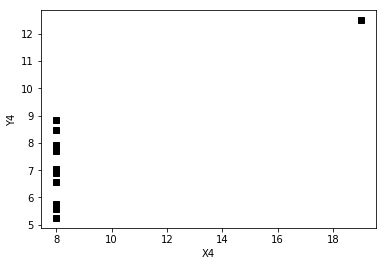

In [2]:
pl.plot(anscombe['x1'],anscombe['y1'],'ks')
# Set some properties for the plot.
pl.xlabel('X1')
pl.ylabel('Y1')
pl.show()

pl.plot(anscombe['x2'],anscombe['y2'],'ks')
pl.xlabel('X2')
pl.ylabel('Y2')
pl.show()

pl.plot(anscombe['x3'],anscombe['y3'],'ks')
pl.xlabel('X3')
pl.ylabel('Y3')
pl.show()

pl.plot(anscombe['x4'],anscombe['y4'],'ks')
pl.xlabel('X4')
pl.ylabel('Y4')
pl.show()

On inspection of the plots each of the XY pairs are quite different, visually. (x1,y1) looks to be fairly randomly spread out with a positive linear slope. (x2,y2) fits a neat curve. (x3,y3) appears to be perfectly linear apart from one datapoint which is a massive outlier. Finally, (x4,y4) is a vertical line aside from a solitary outlier. Each pair have quite distinctive plots. Using the seaborn package, we can further visualise the different pairs. Each plot is overlayed with the line of best fit along with the 95% confidence interval.

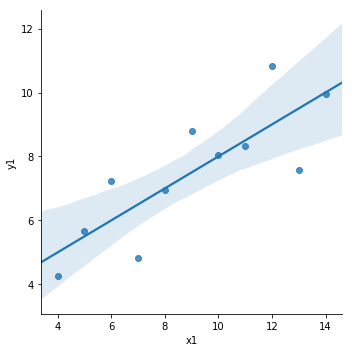

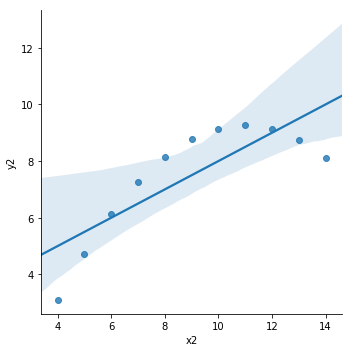

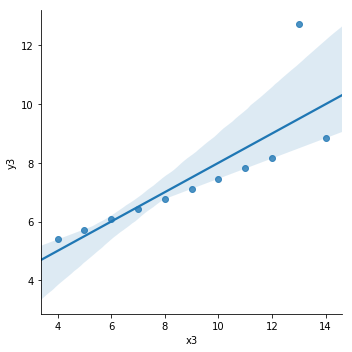

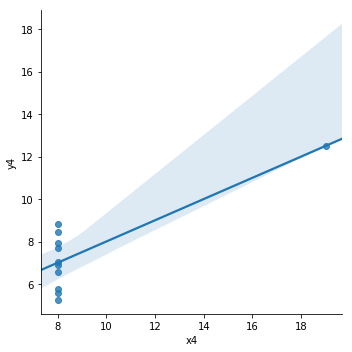

In [3]:
import seaborn as sns
sns.lmplot(x="x1", y="y1", data=anscombe)
sns.lmplot(x="x2", y="y2", data=anscombe)
sns.lmplot(x="x3", y="y3", data=anscombe)
sns.lmplot(x="x4", y="y4", data=anscombe)

We can use the stats package from scipy to get the equations of the regression lines and quantify the predictive power of these.

In [4]:
from scipy import stats  
a=stats.linregress(x=anscombe['x1'], y=anscombe['y1'])
b=stats.linregress(x=anscombe['x2'], y=anscombe['y2'])
c=stats.linregress(x=anscombe['x3'], y=anscombe['y3'])
d=stats.linregress(x=anscombe['x4'], y=anscombe['y4'])

print(a)
print(b)
print(c)
print(d)

LinregressResult(slope=0.5000909090909091, intercept=3.0000909090909103, rvalue=0.8164205163448399, pvalue=0.00216962887307879, stderr=0.11790550059563408)
LinregressResult(slope=0.5000000000000001, intercept=3.000909090909089, rvalue=0.816236506000243, pvalue=0.0021788162369107845, stderr=0.11796374596764074)
LinregressResult(slope=0.4997272727272729, intercept=3.002454545454544, rvalue=0.8162867394895984, pvalue=0.002176305279228015, stderr=0.11787766222100221)
LinregressResult(slope=0.4999090909090909, intercept=3.0017272727272726, rvalue=0.8165214368885028, pvalue=0.002164602347197222, stderr=0.11781894172968553)


Interestingly the equations of these lines are identical (allowing for rounding). Somewhat more surpirsing is the identical R-squared and p-value coefficients. This is strange because each of the plots have drastically different shapes but the exact same regression line has the same predicitive power on each.



# Descriptive Statistics 
The describe function from pandas package can be used generate high level summary about each pair.

In [5]:
#Print a statistical summary about the dataset
print(anscombe.describe()) 

       Unnamed: 0         x1         x2         x3         x4         y1  \
count   11.000000  11.000000  11.000000  11.000000  11.000000  11.000000   
mean     6.000000   9.000000   9.000000   9.000000   9.000000   7.500909   
std      3.316625   3.316625   3.316625   3.316625   3.316625   2.031568   
min      1.000000   4.000000   4.000000   4.000000   8.000000   4.260000   
25%      3.500000   6.500000   6.500000   6.500000   8.000000   6.315000   
50%      6.000000   9.000000   9.000000   9.000000   8.000000   7.580000   
75%      8.500000  11.500000  11.500000  11.500000   8.000000   8.570000   
max     11.000000  14.000000  14.000000  14.000000  19.000000  10.840000   

              y2         y3         y4  
count  11.000000  11.000000  11.000000  
mean    7.500909   7.500000   7.500909  
std     2.031657   2.030424   2.030579  
min     3.100000   5.390000   5.250000  
25%     6.695000   6.250000   6.170000  
50%     8.140000   7.110000   7.040000  
75%     8.950000   7.980000 

This Anscombe datset is very interesting not just due to the many similarities but also the many differences. It seems these datasets are the epitomy of a paradox. Their statistical features are extremly similar, yet when we plot the 4 pairs they are strikingly different from one another. The x columns all have the exact same means and standard deviations with only x4 differing in the minimum,maximum and percentiles from the others. Similarly the y columns share the same means and standard deviations. In addition the relationship between the x and y values of each pair is pretty much identical, with the same R Squared and line of best fit generated for each. Despite these similarities graphing hte 4 pairs depicts a completely different story. From visual inspection, we would find it hard to believe that there are any similarities between these. this shoes the dangers and pitfalls from not fully analysing datasets. it is often important to thoroughly examine the descriptive statistics of datasets but it is crucial to combine these with more information sucha s through graphing datasets. Anscombe’s quartet idataset illustrates the importance of fully understanding variability in a dataset. Despite the same summary measures (mean, std, etc…), the same correlation and the same regression line the datasets have greatly differing distributions.



## References

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html 